In [26]:
import cv2
import io
import pytesseract
from skimage import io as ioski
from skimage.color import rgb2gray
from skimage.transform import rotate
import os
from deskew import determine_skew
import numpy as np

In [85]:
import cv2
import os

# Directorio de entrada y salida
input_directory = "C:\\Users\\pc\\OneDrive\\Escritorio\\OC_pdf\\entrenamiento"  # Carpeta de entrada con las imágenes en escala de grises
output_directory = "C:\\Users\\pc\\OneDrive\\Escritorio\\OC_pdf\\entrenamiento"  # Carpeta de salida donde se guardarán las imágenes en formato RGB

# Lista todos los archivos en el directorio de entrada
for filename in os.listdir(input_directory):
    if filename.endswith(".png"):  # Filtra solo los archivos con extensión .png (ajusta esto según tus necesidades)
        # Ruta completa del archivo de entrada
        input_path = os.path.join(input_directory, filename)
        
        # Cargar la imagen en escala de grises
        gray_image = cv2.imread(input_path, cv2.IMREAD_GRAYSCALE)
        
        # Convertir la imagen en escala de grises a formato RGB
        rgb_image = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2RGB)
        
        # Ruta completa del archivo de salida (con el mismo nombre)
        output_path = os.path.join(output_directory, filename)
        
        # Guardar la imagen resultante en formato RGB
        cv2.imwrite(output_path, rgb_image)

print("Proceso completado.")


Proceso completado.


In [44]:
import pytesseract
from PIL import Image

# Ruta de la imagen de muestra
sample_img = "C:\\Users\\pc\\OneDrive\\Escritorio\\OC_pdf\\juliana2.png"

export TESSDATA_PREFIX="C:\\Users\\pc\\Documents\\Ciencia de datos\\Diplomado_Ciencia_Datos\\Tareas\\0_Proyecto\\spa.traineddata"

hypothesis4 = pytesseract.image_to_string("output_processed.png", lang="esp")

# Realizar OCR en la imagen
try:
    # Abrir la imagen con PIL (Pillow)
    img = Image.open(sample_img)

    # Realizar OCR en la imagen
    text = pytesseract.image_to_string(img)

    # Imprimir el texto extraído
    print("Texto extraído:")
    print(text)
except Exception as e:
    print(f"Ocurrió un error: {str(e)}")


Texto extraído:
| jdheuna Vallejo Range



In [47]:
pip install python-dotenv

In [77]:
#pip install fuzzywuzzy

In [171]:
import os
import cv2
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from keras import backend as K
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Reshape, Bidirectional, LSTM, Dense, Lambda, Activation, BatchNormalization, Dropout
from keras.optimizers import Adam

# Carga de datos
train = pd.read_excel("C:\\Users\\pc\\OneDrive\\Escritorio\\OC_pdf\\entrenamiento.xlsx")# ruta dela rchivo con la información y las imagenes para entrenar
valid = pd.read_excel("C:\\Users\\pc\\OneDrive\\Escritorio\\OC_pdf\\entrenamiento.xlsx")

# Visualización de datos de entrenamiento
plt.figure(figsize=(15, 10))

plt.figure(figsize=(15, 10))

for i in range(6):
    if 0 <= i < len(unreadable):
        img_dir = "C:\\Users\\pc\\OneDrive\\Escritorio\\OC_pdf\\entrenamiento\\" + unreadable.loc[i, 'FILENAME']
        image = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)

        if image is not None:
            plt.imshow(image, cmap='gray')
            plt.title(unreadable.loc[i, 'IDENTITY'], fontsize=12)
            plt.axis('off')
            plt.show()
        else:
            print("Error al cargar la imagen:", img_dir)
    else:
        print("Índice fuera de rango: i =", i)

    
    
plt.subplots_adjust(wspace=0.2, hspace=-0.8)

Índice fuera de rango: i = 0
Índice fuera de rango: i = 1
Índice fuera de rango: i = 2
Índice fuera de rango: i = 3
Índice fuera de rango: i = 4
Índice fuera de rango: i = 5


<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

Índice fuera de rango: i = 0
Índice fuera de rango: i = 1
Índice fuera de rango: i = 2
Índice fuera de rango: i = 3
Índice fuera de rango: i = 4
Índice fuera de rango: i = 5
Number of NaNs in train set      :  0
Number of NaNs in validation set :  0


KeyError: 0

<Figure size 1500x1000 with 0 Axes>

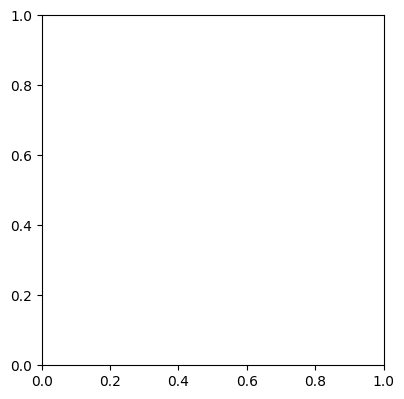

In [168]:
import os
import cv2
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from keras import backend as K
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Reshape, Bidirectional, LSTM, Dense, Lambda, Activation, BatchNormalization, Dropout
from keras.optimizers import Adam

# Carga de datos
train = pd.read_excel("C:\\Users\\pc\\OneDrive\\Escritorio\\OC_pdf\\entrenamiento.xlsx")# ruta dela rchivo con la información y las imagenes para entrenar
valid = pd.read_excel("C:\\Users\\pc\\OneDrive\\Escritorio\\OC_pdf\\entrenamiento.xlsx")


# Visualización de datos de entrenamiento
plt.figure(figsize=(15, 10))

for i in range(6):
    if 0 <= i < len(unreadable):
        img_dir = "C:\\Users\\pc\\OneDrive\\Escritorio\\OC_pdf\\entrenamiento\\" + unreadable.loc[i, 'FILENAME']
        image = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)

        if image is not None:
            plt.imshow(image, cmap='gray')
            plt.title(unreadable.loc[i, 'IDENTITY'], fontsize=12)
            plt.axis('off')
            plt.show()
        else:
            print("Error al cargar la imagen:", img_dir)
    else:
        print("Índice fuera de rango: i =", i)

    
    
plt.subplots_adjust(wspace=0.2, hspace=-0.8)

# Limpieza de datos
print("Number of NaNs in train set      : ", train['IDENTITY'].isnull().sum())
print("Number of NaNs in validation set : ", valid['IDENTITY'].isnull().sum())
train.dropna(axis=0, inplace=True)
valid.dropna(axis=0, inplace=True)

unreadable = train[train['IDENTITY'] == 'UNREADABLE']
unreadable.reset_index(inplace=True, drop=True)

plt.figure(figsize=(15, 10))
for i in range(6):
    ax = plt.subplot(2, 3, i+1)
    img_dir = "C:\\Users\\pc\\OneDrive\\Escritorio\\OC_pdf\\entrenamiento"+unreadable.loc[i, 'FILENAME']
    image = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
    plt.imshow(image, cmap='gray')
    plt.title(unreadable.loc[i, 'IDENTITY'], fontsize=12)
    plt.axis('off')

train = train[train['IDENTITY'] != 'UNREADABLE']
valid = valid[valid['IDENTITY'] != 'UNREADABLE']

train['IDENTITY'] = train['IDENTITY'].str.upper()
valid['IDENTITY'] = valid['IDENTITY'].str.upper()

train.reset_index(inplace=True, drop=True)
valid.reset_index(inplace=True, drop=True)

# Preprocesamiento de imágenes
def preprocess(img):
    (h, w) = img.shape
    final_img = np.ones([64, 256]) * 255  # blank white image
    
    if w > 256:
        img = img[:, :256]
        
    if h > 64:
        img = img[:64, :]
    
    final_img[:h, :w] = img
    return cv2.rotate(final_img, cv2.ROTATE_90_CLOCKWISE)

train_size = 30000
valid_size = 3000
train_x = []

for i in range(train_size):
    img_dir = "C:\\Users\\pc\\OneDrive\\Escritorio\\OC_pdf\\entrenamiento\\"+train.loc[i, 'FILENAME']
    image = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
    image = preprocess(image)
    image = image / 255.
    train_x.append(image)

valid_x = []

for i in range(valid_size):
    img_dir = "C:\\Users\\pc\\OneDrive\\Escritorio\\OC_pdf\\entrenamiento\\"+valid.loc[i, 'FILENAME']
    image = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
    image = preprocess(image)
    image = image / 255.
    valid_x.append(image)

train_x = np.array(train_x).reshape(-1, 256, 64, 1)
valid_x = np.array(valid_x).reshape(-1, 256, 64, 1)

# Preparación de etiquetas para CTC Loss
alphabets = u"ABCDEFGHIJKLMNOPQRSTUVWXYZ-' "
max_str_len = 24
num_of_characters = len(alphabets) + 1
num_of_timestamps = 64

def label_to_num(label):
    label_num = []
    for ch in label:
        label_num.append(alphabets.find(ch))
    return np.array(label_num)

def num_to_label(num):
    ret = ""
    for ch in num:
        if ch == -1:
            break
        else:
            ret += alphabets[ch]
    return ret

train_y = np.ones([train_size, max_str_len]) * -1
train_label_len = np.zeros([train_size, 1])
train_input_len = np.ones([train_size, 1]) * (num_of_timestamps-2)
train_output = np.zeros([train_size])

for i in range(train_size):
    train_label_len[i] = len(train.loc[i, 'IDENTITY'])
    train_y[i, 0:len(train.loc[i, 'IDENTITY'])] = label_to_num(train.loc[i, 'IDENTITY'])    

valid_y = np.ones([valid_size, max_str_len]) * -1
valid_label_len = np.zeros([valid_size, 1])
valid_input_len = np.ones([valid_size, 1]) * (num_of_timestamps-2)
valid_output = np.zeros([valid_size])

for i in range(valid_size):
    valid_label_len[i] = len(valid.loc[i, 'IDENTITY'])
    valid_y[i, 0:len(valid.loc[i, 'IDENTITY'])] = label_to_num(valid.loc[i, 'IDENTITY'])


In [131]:
unreadable

,FILENAME,IDENTITY


In [117]:
if not unreadable.empty:
    for i in range(6):
        if i < len(unreadable):
            img_dir = "C:\\Users\\pc\\OneDrive\\Escritorio\\OC_pdf\\entrenamiento\\" + unreadable.loc[i, 'FILENAME']
            image = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)

            if image is not None:
                plt.imshow(image, cmap='gray')
                plt.title(unreadable.loc[i, 'IDENTITY'], fontsize=12)
                plt.axis('off')
                plt.show()
            else:
                print("Error al cargar la imagen:", img_dir)
        else:
            print("Índice fuera de rango: i =", i)
else:
    print("No hay datos en la variable 'unreadable'.")


No hay datos en la variable 'unreadable'.


In [1]:
if image is not None:
    plt.imshow(image, cmap='gray')
    plt.title(train.loc[i, 'IDENTITY'], fontsize=12)
    plt.axis('off')
    plt.show()
else:
    print("Error al cargar la imagen:", img_dir)

NameError: name 'image' is not defined

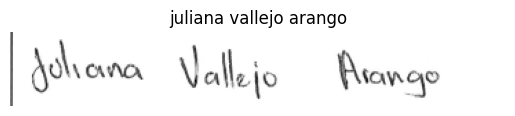

In [135]:
import cv2
import matplotlib.pyplot as plt

# Ruta de la carpeta que contiene las imágenes de entrenamiento
folder_path = "C:\\Users\\pc\\OneDrive\\Escritorio\\OC_pdf\\entrenamiento\\"

# Nombre del archivo de la imagen
image_filename = train.loc[i, 'FILENAME']

# Ruta completa de la imagen
img_dir = folder_path + image_filename

# Intenta cargar la imagen en escala de grises
image = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)

if image is not None:
    # La imagen se cargó correctamente en escala de grises
    plt.imshow(image, cmap='gray')
    plt.title(train.loc[i, 'IDENTITY'], fontsize=12)
    plt.axis('off')
    plt.show()
else:
    # La imagen no se cargó correctamente
    print("Error al cargar la imagen:", img_dir)